# 1. Count audiofiles (.wav, .flac)

In [28]:
import glob

In [93]:
train_directory_path = ['/data/nota/audio_data/audiocaps_1m/*/*.wav',
                  '/data/nota/audio_data/Clotho/*/*.wav',
                  '/data/nota/audio_data/GigaSpeech/*/*.wav',
                  '/data/nota/audio_data/LibriSpeech/*/*/*/*.wav',
                  '/data/nota/audio_data/MusicNet/*/*.wav',
                  '/data/nota/audio_data/WavCaps/AudioSet_SL/*.wav',
                  '/data/nota/audio_data/WavCaps/BBC_Sound_Effects/*.wav',
                  '/data/nota/audio_data/WavCaps/FreeSound/*/*.wav',
                  '/data/nota/audio_data/WavCaps/SoundBible/*.wav',
                  '/data/nota/audio_data/audiocaps_1m/*/*.flac',
                  '/data/nota/audio_data/Clotho/*/*.flac',
                  '/data/nota/audio_data/GigaSpeech/*/*.flac',
                  '/data/nota/audio_data/LibriSpeech/*/*/*/*.flac',
                  '/data/nota/audio_data/MusicNet/*/*.flac',
                  '/data/nota/audio_data/WavCaps/AudioSet_SL/*.flac',
                  '/data/nota/audio_data/WavCaps/BBC_Sound_Effects/*.flac',
                  '/data/nota/audio_data/WavCaps/FreeSound/*/*.flac',
                  '/data/nota/audio_data/WavCaps/SoundBible/*.flac'
                  ]

test_directory_path = ['/data/nota/audio_data/audiocaps_1m/test/*.wav',
                       '/data/nota/audio_data/LibriSpeech/test-other/*/*/*.flac']

In [123]:
total = 0
test_total = 0

for i in range(len(train_directory_path)):
    file_count = len(glob.glob(train_directory_path[i]))
    if file_count > 0:
        print(f'{train_directory_path[i][22:]}: {file_count}개')
    total += file_count

print()
print(f'Total 오디오 파일: {total}개')
print()

for i in range(len(test_directory_path)):
    test_file_count = len(glob.glob(test_directory_path[i]))
    print(f'{test_directory_path[i][22:]} => {test_file_count}개')
    test_total += test_file_count

print()
print(f'Train 오디오 파일: {total - test_total}개')
print(f'Test 오디오 파일: {test_total}개')

audiocaps_1m/*/*.wav: 51002개
Clotho/*/*.wav: 2893개
GigaSpeech/*/*.wav: 910140개
MusicNet/*/*.wav: 320개
LibriSpeech/*/*/*/*.flac: 284180개
WavCaps/AudioSet_SL/*.flac: 107311개
WavCaps/BBC_Sound_Effects/*.flac: 23791개
WavCaps/FreeSound/*/*.flac: 236289개
WavCaps/SoundBible/*.flac: 1090개

Total 오디오 파일: 1617016개

audiocaps_1m/test/*.wav => 4355개
LibriSpeech/test-other/*/*/*.flac => 2939개

Train 오디오 파일: 1609722개
Test 오디오 파일: 7294개


In [ ]:
import os

directory_path = '/data/nota/audio_data'

file_count = 0

for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.flac'):
            file_count += 1

print(f'하위 디렉토리 포함 .wav, .flac 파일 개수: {file_count}')


하위 디렉토리 포함 .wav, .flac 파일 개수: 1617016


In [10]:
from pathlib import Path

directory_path = Path('/data/nota/audio_data')

files = list(directory_path.rglob('*.wav')) + list(directory_path.rglob('*.flac'))  # '*'는 모든 파일을 의미

file_count = len([f for f in files if f.is_file()])  # 파일만 셈
print(f'하위 디렉토리 포함 .wav, .flac 파일 개수: {file_count}')

하위 디렉토리 포함 .wav, .flac 파일 개수: 1617016


# 2. Make CSV (with duration)

In [116]:
import librosa

y, sr = librosa.load('/data/nota/audio_data/audiocaps_1m/train/0.wav', sr=None)
duration = librosa.get_duration(y=y, sr=sr)

print(duration)

23.638


In [ ]:
import json
import pandas as pd
import librosa
from tqdm import tqdm

json_path = '/data/nota/level4-cv-finalproject-hackathon-cv-03-lv3/audio_data/stage1_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

stage1_df = pd.DataFrame(audio_length)
stage1_df.to_csv('/data/nota/EDA/stage1_train.csv', sep=',', encoding='utf-8', header=True)

In [35]:
import json
import pandas as pd
import librosa
from tqdm import tqdm

json_path = '../eda용json/train/stage2_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

stage2_df = pd.DataFrame(audio_length)
stage2_df.to_csv('/data/nota/EDA/stage2_train.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 1403890/1403890 [2:48:08<00:00, 139.16it/s]  


# 3. EDA audio length

## 3.1 Duration > 30sec

In [1]:
import pandas as pd
stage2_df = pd.read_csv('stage2_train.csv')
stage1_df = pd.read_csv('stage1_train.csv')

In [2]:
c = stage1_df['duration'] > 30.0
stage1_df[c]['task'].value_counts()

task
audiocaption    96590
Name: count, dtype: int64

In [27]:
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q
1298693,1298693,WavCaps/FreeSound/150000-180000/439733.flac,68.256500,Someone is shaking poppy seeds.,audiocaption,NaN
1298694,1298694,WavCaps/FreeSound/150000-180000/487222.flac,142.089500,Cloth movement is heard.,audiocaption,NaN
1298699,1298699,WavCaps/FreeSound/30000-60000/93305.flac,105.600000,A train is arriving at a station.,audiocaption,NaN
1298704,1298704,WavCaps/FreeSound/60000-90000/158596.flac,92.064312,Machine is in use and people are talking in a ...,audiocaption,NaN
1298708,1298708,WavCaps/FreeSound/120000-150000/367229.flac,170.749437,Someone is walking in a park.,audiocaption,NaN
...,...,...,...,...,...,...
1557995,1557995,WavCaps/BBC_Sound_Effects/NHU05017103.flac,125.968375,Monkeys are making calls and birds are singing.,audiocaption,NaN
1557996,1557996,WavCaps/BBC_Sound_Effects/NHU05064080.flac,67.764313,Birds are calling.,audiocaption,NaN
1557997,1557997,WavCaps/BBC_Sound_Effects/NHU05010028.flac,47.535625,Calls are heard in a bird colony. Wingbeats fr...,audiocaption,NaN
1557999,1557999,WavCaps/BBC_Sound_Effects/NHU05073111.flac,62.553938,Wind is blowing through palm fronds.,audiocaption,NaN


In [3]:
c = stage2_df['duration'] > 30.0
stage2_df[c]['task'].value_counts()

task
audiocaption_v2    31913
QA                   320
Name: count, dtype: int64

In [4]:
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
17,17,audiocaps_1m/train/65022.wav,60.000,"Water pouring out, a male and woman speaking",audiocaption_v2,NaN
91,91,audiocaps_1m/train/61159.wav,60.000,A sewing machine runs slowly,audiocaption_v2,NaN
109,109,audiocaps_1m/train/91973.wav,60.000,Someone is talking normally as birds squawk in...,audiocaption_v2,NaN
130,130,audiocaps_1m/train/87497.wav,60.000,A man speaks followed by hard clicking typing,audiocaption_v2,NaN
198,198,audiocaps_1m/train/39585.wav,39.711,Woman talking while a dog barks and woman make...,audiocaption_v2,NaN
...,...,...,...,...,...,...
1403641,1403641,audiocaps_1m/train/109407.wav,60.000,Birds chirp and animals vocalize,audiocaption_v2,NaN
1403718,1403718,audiocaps_1m/train/19511.wav,60.000,"Rustling, hissing and rattling are present, an...",audiocaption_v2,NaN
1403733,1403733,audiocaps_1m/train/101675.wav,60.000,A man speaks with several clicks and ticks,audiocaption_v2,NaN
1403867,1403867,audiocaps_1m/train/17650.wav,40.937,"A deep hum is present, a cat meows, and a pers...",audiocaption_v2,NaN


## 3.2 Duration < 1sec

In [51]:
stage1_df[c]['task'].value_counts()

task
asr             41767
audiocaption       25
Name: count, dtype: int64

In [5]:
c = stage1_df['duration'] < 1.0
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q
169251,169251,LibriSpeech/train-other-500/3033/130750/3033-1...,0.830000,I,asr,NaN
178097,178097,LibriSpeech/train-other-500/3557/8342/3557-834...,0.920000,I have,asr,NaN
281257,281257,GigaSpeech/18/YOU0000000491_S0000106.wav,0.810000,"By the way,",asr,NaN
281275,281275,GigaSpeech/8/POD0000000240_S0000231.wav,0.980000,"Nothing special,",asr,NaN
281278,281278,GigaSpeech/18/YOU0000000113_S0000439.wav,0.730000,"Again,",asr,NaN
...,...,...,...,...,...,...
1273029,1273029,WavCaps/AudioSet_SL/Y3Y_esee5qr8.flac,0.975250,Sound effects play.,audiocaption,NaN
1292000,1292000,WavCaps/AudioSet_SL/Y-xNzcshM6Bo.flac,0.580500,A snort is heard.,audiocaption,NaN
1292588,1292588,WavCaps/AudioSet_SL/YeNb-ZoDx1r4.flac,0.473500,A sound effect is heard.,audiocaption,NaN
1293312,1293312,WavCaps/AudioSet_SL/Yb7eg5WmiPKg.flac,0.835938,Static noise can be heard.,audiocaption,NaN


In [7]:
stage2_df[c]['task'].value_counts()

task
asr                  9182
QA                     27
audiocaption_v2         6
phone_recognition       2
Name: count, dtype: int64

In [13]:
c = stage2_df['duration'] < 1.0
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
55,55,GigaSpeech/19/YOU0000002191_S0000054.wav,0.87,Or bo?,asr,NaN
396,396,GigaSpeech/21/YOU0000004637_S0000644.wav,0.78,"But,",asr,NaN
553,553,GigaSpeech/12/POD0000005603_S0000124.wav,0.69,"And,",asr,NaN
555,555,GigaSpeech/27/YOU0000009863_S0000381.wav,0.90,These,asr,NaN
741,741,GigaSpeech/16/POD0000010368_S0000112.wav,0.86,"This plan,",asr,NaN
...,...,...,...,...,...,...
1403008,1403008,GigaSpeech/9/POD0000000792_S0000353.wav,0.82,Quite often.,asr,NaN
1403034,1403034,GigaSpeech/27/YOU0000010251_S0000534.wav,0.66,Okay.,asr,NaN
1403047,1403047,GigaSpeech/19/YOU0000001341_S0000142.wav,0.99,"Anyways,",asr,NaN
1403391,1403391,GigaSpeech/18/YOU0000000171_S0001575.wav,0.96,He said.,asr,NaN


## 3.3 Duration = 0sec

In [14]:
stage1_df

,Unnamed: 0,path,duration,text,task,Q
0,0,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,Chapter one missus rachel lynde is surprised m...,asr,NaN
1,1,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,That had its source away back in the woods of ...,asr,NaN
2,2,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,For not even a brook could run past missus rac...,asr,NaN
3,3,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,And that if she noticed anything odd or out of...,asr,NaN
4,4,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,But missus rachel lynde was one of those capab...,asr,NaN
...,...,...,...,...,...,...
1573553,1573553,Clotho/train/Heavy rain - some people 2.wav,0,A heavy rain coming down outside with people t...,audiocaption,NaN
1573554,1573554,Clotho/train/Heavy rain - some people 2.wav,0,A heavy rain falls outside while people talk i...,audiocaption,NaN
1573555,1573555,Clotho/train/Heavy rain - some people 2.wav,0,Rain falling while people talk in the background.,audiocaption,NaN
1573556,1573556,Clotho/train/Heavy rain - some people 2.wav,0,Rain is falling as people talk in the background.,audiocaption,NaN


In [10]:
c = stage1_df['duration'] == 0.0
stage1_df[c]

,Unnamed: 0,path,duration,text,task,Q
0,0,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,Chapter one missus rachel lynde is surprised m...,asr,NaN
1,1,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,That had its source away back in the woods of ...,asr,NaN
2,2,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,For not even a brook could run past missus rac...,asr,NaN
3,3,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,And that if she noticed anything odd or out of...,asr,NaN
4,4,LibriSpeech/train-clean-100/103/1240/103-1240-...,0,But missus rachel lynde was one of those capab...,asr,NaN
...,...,...,...,...,...,...
1573553,1573553,Clotho/train/Heavy rain - some people 2.wav,0,A heavy rain coming down outside with people t...,audiocaption,NaN
1573554,1573554,Clotho/train/Heavy rain - some people 2.wav,0,A heavy rain falls outside while people talk i...,audiocaption,NaN
1573555,1573555,Clotho/train/Heavy rain - some people 2.wav,0,Rain falling while people talk in the background.,audiocaption,NaN
1573556,1573556,Clotho/train/Heavy rain - some people 2.wav,0,Rain is falling as people talk in the background.,audiocaption,NaN


In [11]:
c = stage2_df['duration'] == 0.0
stage2_df[c]

,Unnamed: 0,path,duration,text,task,Q
14303,14303,audiocaps_1m/train/72870.wav,0.0,Someone whistles a song,audiocaption_v2,NaN
56997,56997,audiocaps_1m/train/24172.wav,0.0,"Sizzling, stirring and frying of food, followe...",audiocaption_v2,NaN
540085,540085,audiocaps_1m/train/20994.wav,0.0,A male voice talking with some faint sizzling ...,audiocaption_v2,NaN


## 3.4 Sampling rate

In [26]:
import json
import pandas as pd
import librosa
import os
from tqdm import tqdm

json_path = '../eda용json/train/stage1_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

sampling_rate = []

for item in tqdm(ann):
    audio_path = item.get('path', '')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    _, sr = librosa.load(full_path, sr=None)
    
    sampling_rate.append({'path': audio_path, 'sampling_rate': sr})

sampling_rate_df = pd.DataFrame(sampling_rate)
sampling_rate_df.to_csv('stage1_train_sampling_rate.csv', sep=',', encoding='utf-8', index=False)

100%|██████████| 1573558/1573558 [4:23:40<00:00, 99.47it/s]   


In [ ]:
import json
import pandas as pd
import librosa
import os
from tqdm import tqdm

json_path = '../eda용json/train/stage2_train.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

sampling_rate = []

for item in tqdm(ann):
    audio_path = item.get('path', '')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    _, sr = librosa.load(full_path, sr=None)
    
    sampling_rate.append({'path': audio_path, 'sampling_rate': sr})

sampling_rate_df = pd.DataFrame(sampling_rate)
sampling_rate_df.to_csv('stage2_train_sampling_rate.csv', sep=',', encoding='utf-8', index=False)

## 3.4 Visualization

In [2]:
import pandas as pd

stage1_df = pd.read_csv('stage1_train.csv')
stage2_df = pd.read_csv('stage2_train.csv')

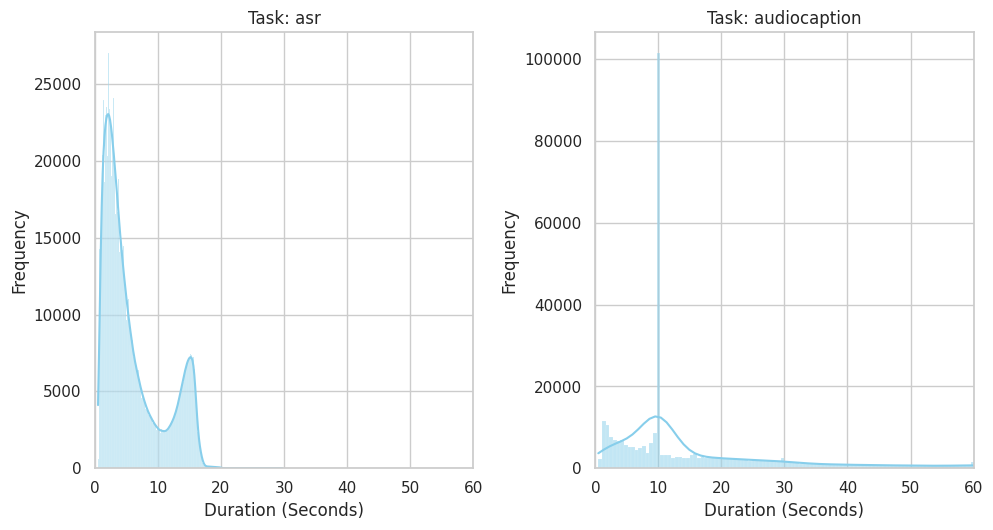

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 서브플롯의 행과 열 설정 (3x2 형태에서 5개의 플롯만 사용)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2행 3열의 서브플롯
axes = axes.flatten()  # 2D 배열을 1D로 변환

# task의 고유 값들로 서브플롯을 그리기
tasks = stage1_df['task'].unique()  # task의 고유 값들

# 6번째 plot을 제거하려면 tasks의 길이를 5로 제한
tasks = tasks[:5]

for i, task in enumerate(tasks):
    ax = axes[i]  # 각 서브플롯에 접근
    task_data = stage1_df[stage1_df['task'] == task]  # 해당 task의 데이터 필터링
    
    # 히스토그램 그리기
    sns.histplot(task_data, x='duration', kde=True, ax=ax, color='skyblue', multiple='stack')
    
    # # x축과 y축 범위 설정
    ax.set_xlim(0, 60)
    # ax.set_ylim(0, 35000)
    
    # 그래프 제목과 레이블 추가
    ax.set_title(f'Task: {task}')
    ax.set_xlabel('Duration (Seconds)')
    ax.set_ylabel('Frequency')

# 나머지 서브플롯 비워두기
for j in range(len(tasks), len(axes)):
    fig.delaxes(axes[j])  # 6번째 플롯 제거

# 서브플롯 간 간격 조정
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace: 수직 간격, wspace: 수평 간격

# 그래프 출력
plt.tight_layout()
plt.show()


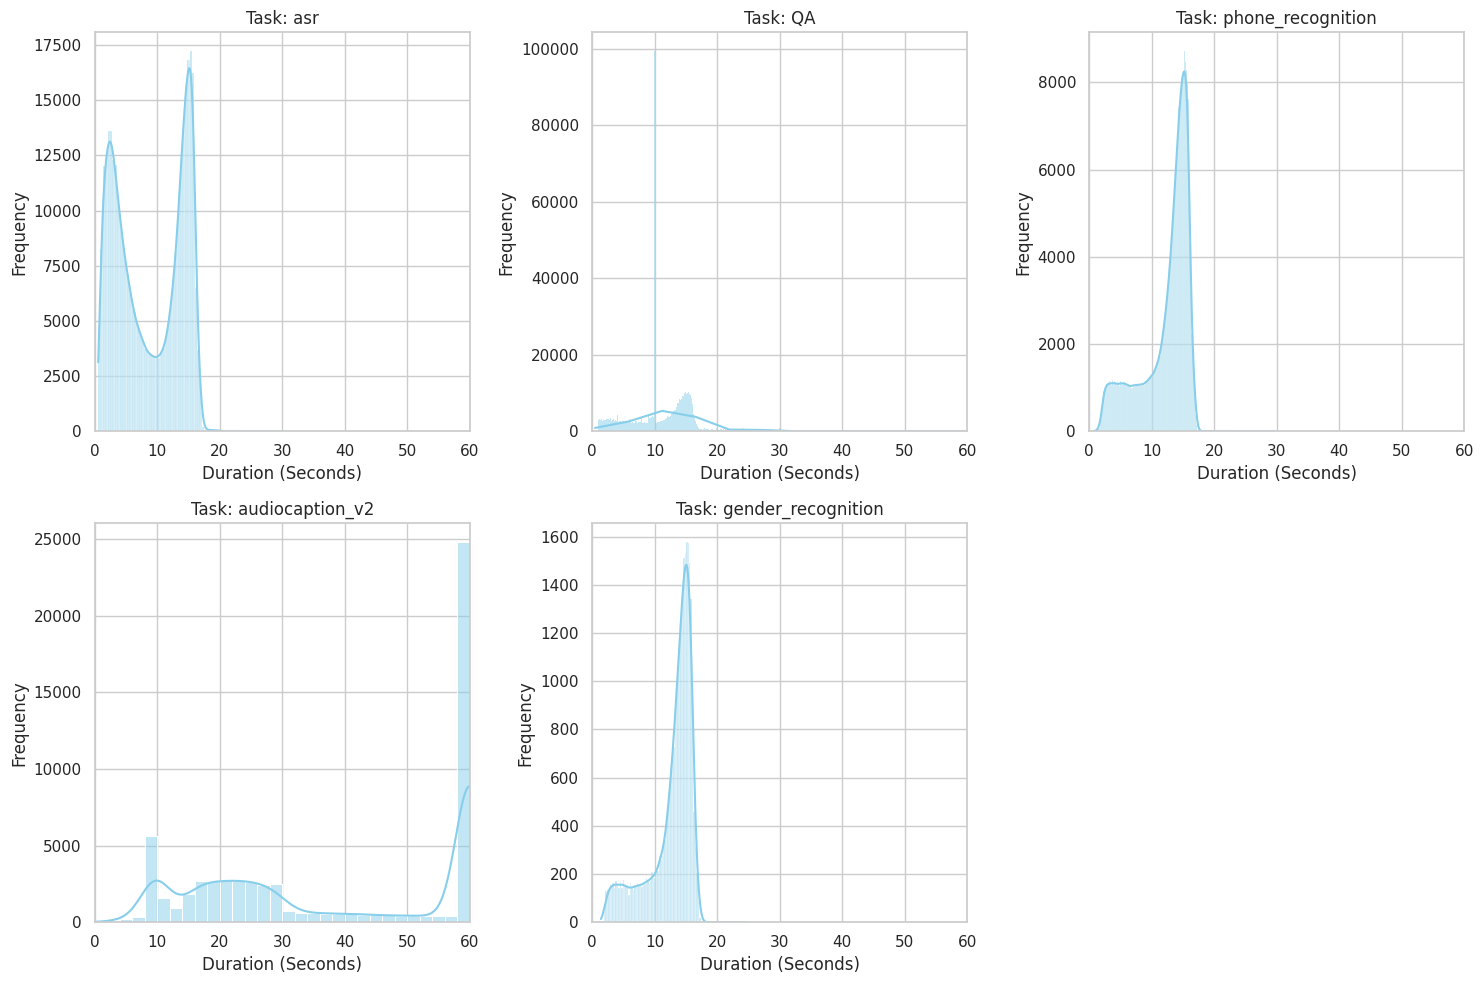

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 서브플롯의 행과 열 설정 (3x2 형태에서 5개의 플롯만 사용)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 2행 3열의 서브플롯
axes = axes.flatten()  # 2D 배열을 1D로 변환

# task의 고유 값들로 서브플롯을 그리기
tasks = stage2_df['task'].unique()  # task의 고유 값들

# 6번째 plot을 제거하려면 tasks의 길이를 5로 제한
tasks = tasks[:5]

for i, task in enumerate(tasks):
    ax = axes[i]  # 각 서브플롯에 접근
    task_data = stage2_df[stage2_df['task'] == task]  # 해당 task의 데이터 필터링
    
    # 히스토그램 그리기
    sns.histplot(task_data, x='duration', kde=True, ax=ax, color='skyblue', multiple='stack')
    
    # # x축과 y축 범위 설정
    ax.set_xlim(0, 60)
    # ax.set_ylim(0, 30000)
    
    # 그래프 제목과 레이블 추가
    ax.set_title(f'Task: {task}')
    ax.set_xlabel('Duration (Seconds)')
    ax.set_ylabel('Frequency')

# 나머지 서브플롯 비워두기
for j in range(len(tasks), len(axes)):
    fig.delaxes(axes[j])  # 6번째 플롯 제거

# 서브플롯 간 간격 조정
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace: 수직 간격, wspace: 수평 간격

# 그래프 출력
plt.tight_layout()
plt.show()


In [80]:
stage1_df['task'].value_counts()

task
asr             1191381
audiocaption     382177
Name: count, dtype: int64

In [81]:
stage2_df['task'].value_counts()

task
QA                    551759
asr                   481241
phone_recognition     281239
audiocaption_v2        61112
gender_recognition     28539
Name: count, dtype: int64

In [84]:
c = stage2_df['task'] == 'gender_recognition'
stage2_df['text'][c].head(20)

23     Female
63       Male
98       Male
141    Female
299      Male
303    Female
315    Female
317    Female
373    Female
381    Female
424      Male
454      Male
462    Female
489    Female
587    Female
602      Male
703    Female
713    Female
733    Female
816      Male
Name: text, dtype: object

In [102]:
stage2_df[stage2_df['text'].isna()]['path'].values

array(['LibriSpeech/train-other-500/252/132011/252-132011-0021.flac',
       'LibriSpeech/train-other-500/7424/98598/7424-98598-0014.flac',
       'LibriSpeech/train-clean-360/6567/53342/6567-53342-0110.flac',
       'LibriSpeech/train-clean-360/2053/138888/2053-138888-0039.flac',
       'LibriSpeech/train-clean-360/1769/143485/1769-143485-0032.flac'],
      dtype=object)

In [103]:
stage2_df[stage2_df['text'].isna()]

,Unnamed: 0,path,duration,text,task,Q
94797,94797,LibriSpeech/train-other-500/252/132011/252-132...,14.595,NaN,QA,What did Novosiltsev receive as an answer?
293282,293282,LibriSpeech/train-other-500/7424/98598/7424-98...,15.265,NaN,QA,What was the only part we had in the cross?
370745,370745,LibriSpeech/train-clean-360/6567/53342/6567-53...,6.755,NaN,QA,Who spoke touching words to the speaker's heart?
479893,479893,LibriSpeech/train-clean-360/2053/138888/2053-1...,11.280,NaN,QA,What does the speaker intend to have for the o...
729475,729475,LibriSpeech/train-clean-360/1769/143485/1769-1...,13.035,NaN,QA,What benefit would the species receive from al...


In [107]:
stage2_df[stage2_df['task'] == 'QA']

,Unnamed: 0,path,duration,text,task,Q
1,1,LibriSpeech/train-clean-100/6836/61803/6836-61...,14.295000,Maurice Gerald,QA,Who has been acquitted?
2,2,LibriSpeech/train-clean-100/8425/246962/8425-2...,13.995000,Leopold lay wound in the net of a low fever al...,QA,What was Leopold's condition before morning?
3,3,LibriSpeech/train-other-500/4969/73975/4969-73...,8.865000,The choice between right and wrong placing app...,QA,What appeared to the speaker?
5,5,WavCaps/FreeSound/90000-120000/245036.flac,8.775750,The vending machine.,QA,What is spinning?
7,7,WavCaps/FreeSound/30000-60000/97745.flac,4.440000,The sound of a coin turning over a porcelain p...,QA,What sound is playing?
...,...,...,...,...,...,...
1403881,1403881,LibriSpeech/train-other-500/448/135065/448-135...,6.240000,The speaker considered it best to depart witho...,QA,Why did the speaker decide to leave without se...
1403883,1403883,WavCaps/FreeSound/60000-90000/215392.flac,13.839125,Retrieving a pen from it with velcro.,QA,What is someone doing with a messenger bag?
1403884,1403884,WavCaps/FreeSound/0-30000/3822.flac,13.000000,A low frequency drone.,QA,What sound is being described?
1403886,1403886,LibriSpeech/train-clean-100/1034/121119/1034-1...,2.460000,"I'm not sure, the sentence doesn't provide con...",QA,Why do you think this fellow needs to be excus...


In [38]:
p = stage2_df.iloc[293282]['path']
print(p)

WavCaps/FreeSound/60000-90000/215392.flac


In [19]:
from IPython.display import Audio

# FLAC 파일의 경로
path_to_flac = '../audio_data/' + 'LibriSpeech/train-other-500/7424/98598/7424-98598-0014.flac'

# Audio 객체 생성과 동시에 재생
audio = Audio(filename=path_to_flac)

# 재생 위젯 표시
display(audio)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [1]:
import speech_recognition as sr

def speech_to_text(audio_file):
    recognizer = sr.Recognizer()

    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)

    try:
        # Set language to English
        text = recognizer.recognize_google(audio_data, language='en-US')
        return text
    except sr.UnknownValueError:
        print("The speech could not be recognized.")
    except sr.RequestError:
        print("Could not access the Google Web API.")
    
    return None

if __name__ == "__main__":
    audio_file = "/data/nota/audio_data/LibriSpeech/train-other-500/252/132011/252-132011-0021.flac"  # Change this to the path of your .flac audio file
    text = speech_to_text(audio_file)

    if text:
        print("The speech has been converted to text:")
        print(text)

The speech has been converted to text:
what answer did novelty of get none the English have not understood and cannot understand it's a self-abnegation of our emperor wants nothing for himself but only desires the good of mankind


"Novosiltsev received an answer about the self-abnegation of the emperor, stating that the emperor wants nothing for himself but only desires the good of mankind."


# 4. Make test CSV (with duration)

In [45]:
import json
import pandas as pd
import librosa
from tqdm import tqdm
import os

json_path = '../eda용json/test/test_asr.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

test_asr_df = pd.DataFrame(audio_length)
test_asr_df.to_csv('/data/nota/EDA/test_asr.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 2939/2939 [00:18<00:00, 158.86it/s]


In [47]:
import json
import pandas as pd
import librosa
from tqdm import tqdm
import os

json_path = '../eda용json/test/test_aac.json'

with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

ann = data.get('annotation', [])

audio_length = []

for item in tqdm(ann):
    audio_path = item.get('path','')
    if audio_path[0] == '/':
        audio_path = audio_path[1:]

    full_path = os.path.join('/data/nota/audio_data/', audio_path)
    y, sr = librosa.load(full_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    text = item.get('text', '')
    task = item.get('task', '')
    Q = item.get('Q', None)

    audio_length.append({'path':audio_path, 'duration':duration, 'text':text, 'task':task, 'Q':Q})

test_aac_df = pd.DataFrame(audio_length)
test_aac_df.to_csv('/data/nota/EDA/test_aac.csv', sep=',', encoding='utf-8', header=True)

100%|██████████| 4355/4355 [02:51<00:00, 25.41it/s]


# EDA

In [1]:
import pandas as pd

test_asr_df = pd.read_csv('/data/nota/EDA/test_asr.csv')
test_aac_df = pd.read_csv('/data/nota/EDA/test_aac.csv')

In [2]:
test_aac_df

,Unnamed: 0,path,duration,text,task,Q
0,0,audiocaps/test/103549.wav,60.000,NaN,audiocaption_v2,NaN
1,1,audiocaps/test/103548.wav,7.430,NaN,audiocaption_v2,NaN
2,2,audiocaps/test/103541.wav,29.149,NaN,audiocaption_v2,NaN
3,3,audiocaps/test/103542.wav,60.000,NaN,audiocaption_v2,NaN
4,4,audiocaps/test/103545.wav,60.000,NaN,audiocaption_v2,NaN
...,...,...,...,...,...,...
4350,4350,audiocaps/test/103094.wav,15.472,NaN,audiocaption_v2,NaN
4351,4351,audiocaps/test/103093.wav,34.389,NaN,audiocaption_v2,NaN
4352,4352,audiocaps/test/103092.wav,60.000,NaN,audiocaption_v2,NaN
4353,4353,audiocaps/test/103091.wav,60.000,NaN,audiocaption_v2,NaN


In [4]:
test_asr_df

,Unnamed: 0,path,duration,text,task,Q
0,0,LibriSpeech/test-other/1688/142285/1688-142285...,15.000,NaN,asr,NaN
1,1,LibriSpeech/test-other/1688/142285/1688-142285...,12.625,NaN,asr,NaN
2,2,LibriSpeech/test-other/1688/142285/1688-142285...,2.835,NaN,asr,NaN
3,3,LibriSpeech/test-other/1688/142285/1688-142285...,5.060,NaN,asr,NaN
4,4,LibriSpeech/test-other/1688/142285/1688-142285...,4.475,NaN,asr,NaN
...,...,...,...,...,...,...
2934,2934,LibriSpeech/test-other/8461/281231/8461-281231...,9.120,NaN,asr,NaN
2935,2935,LibriSpeech/test-other/8461/281231/8461-281231...,9.770,NaN,asr,NaN
2936,2936,LibriSpeech/test-other/8461/281231/8461-281231...,6.740,NaN,asr,NaN
2937,2937,LibriSpeech/test-other/8461/281231/8461-281231...,7.330,NaN,asr,NaN


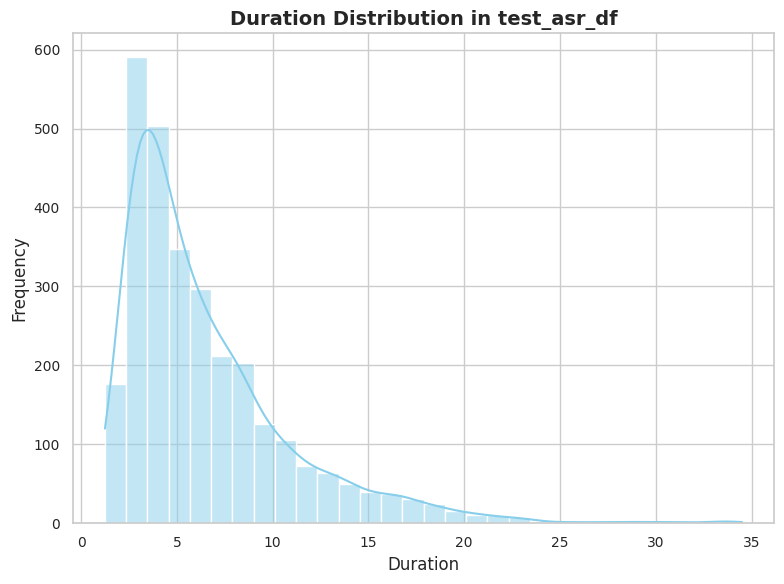

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.histplot(test_asr_df['duration'], kde=True, bins=30, color='skyblue')

plt.title("Duration Distribution in test_asr_df", fontsize=14, fontweight="bold")
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tick_params(axis="both", labelsize=10)

plt.tight_layout()
plt.show()


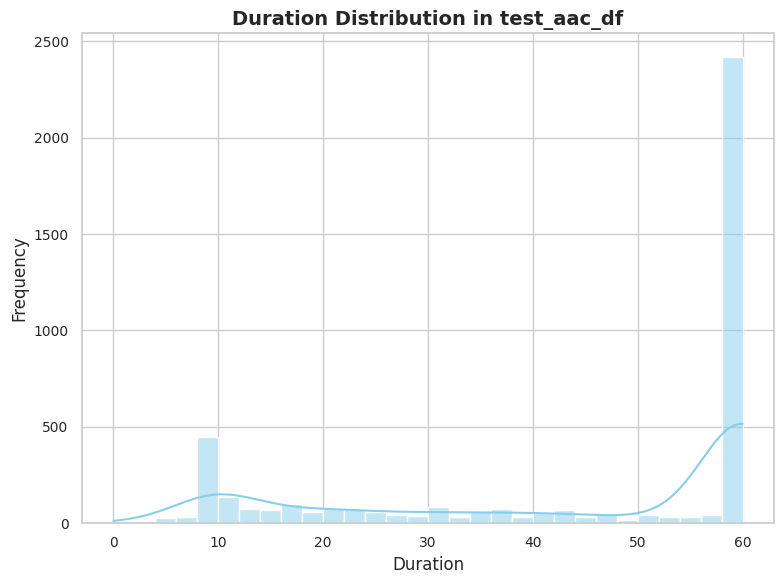

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.histplot(test_aac_df['duration'], kde=True, bins=30, color='skyblue')

plt.title("Duration Distribution in test_aac_df", fontsize=14, fontweight="bold")
plt.xlabel("Duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tick_params(axis="both", labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import librosa

audio_file_path = 'path_to_your_audio_file.wav'

y, sr = librosa.load(audio_file_path, sr=None)

print(f"Audio Sample Rate: {sr}")

In [10]:
stage1_df.head()

,Unnamed: 0,path,duration,text,task,Q
0,0,LibriSpeech/train-clean-100/103/1240/103-1240-...,14.085,Chapter one missus rachel lynde is surprised m...,asr,NaN
1,1,LibriSpeech/train-clean-100/103/1240/103-1240-...,15.945,That had its source away back in the woods of ...,asr,NaN
2,2,LibriSpeech/train-clean-100/103/1240/103-1240-...,13.945,For not even a brook could run past missus rac...,asr,NaN
3,3,LibriSpeech/train-clean-100/103/1240/103-1240-...,14.710,And that if she noticed anything odd or out of...,asr,NaN
4,4,LibriSpeech/train-clean-100/103/1240/103-1240-...,12.515,But missus rachel lynde was one of those capab...,asr,NaN


In [17]:
import librosa
def f(x):
    _, sr = librosa.load('../audio_data/' +x, sr=None)  # sr=None을 설정하면 원본 샘플레이트로 읽어옴
    
    return sr

In [25]:
dir = []
for i in stage1_df['path']:
    if i[0] == '/':
        i = i[1:]

    dataset = i.split('/')[0]

    if dataset not in dir:
        dir.append(dataset)

In [26]:
dir

['LibriSpeech', 'GigaSpeech', 'WavCaps', 'Clotho']

In [27]:
dir = []
for i in stage2_df['path']:
    if i[0] == '/':
        i = i[1:]

    dataset = i.split('/')[0]

    if dataset not in dir:
        dir.append(dataset)

In [28]:
dir

['GigaSpeech', 'LibriSpeech', 'WavCaps', 'audiocaps_1m', 'Clotho', 'MusicNet']

In [2]:
import pandas as pd

stage1_sr = pd.read_csv('/data/nota/EDA/stage1_train_sampling_rate.csv')

stage1_sr['sampling_rate'].value_counts()

sampling_rate
16000    1573558
Name: count, dtype: int64

In [3]:
stage2_sr = pd.read_csv('/data/nota/EDA/stage2_train_sampling_rate.csv')

stage2_sr['sampling_rate'].value_counts()

sampling_rate
16000    1403890
Name: count, dtype: int64